# 이항 확률 분포

성공확률이 $\theta$ 인 베르누이 시도를 $N$번 하는 경우를 생각해 보자. 가장 운이 좋을 때에는 $N$번 모두 성공할 것이고 가장 운이 나쁜 경우에는 한 번도 성공하지 못할 겻이다. $N$번 중 성공한 횟수를 확률 변수 $X$ 라고 한다면 $X$의 값은 0 부터 $N$ 까지의 정수 중 하나가 될 것이다. 

이러한 확률 변수를 **이항 분포(binomial distribution)**를 따르는 확률 변수라고 하며 다음과 같이 표시한다.

$$ X \sim \text{Bin}(x;N,\theta)  $$

이항 확률 분포를 수식으로 묘사해 보자.

0 또는 1이 나오는 베르누이 확률 분포를 따르는 확률 변수 $Y$를 가정한다. 

$$ Y \sim \text{Bern}(y;\theta) $$

이 확률 변수의 $N$개의 샘플을 $y_1, y_2, \cdots, y_N$라고 하자. 이 값은 모두 0(실패) 아니면 1(성공) 이라는 값을 가지기 때문에 $N$번 중 성공한 횟수는 $N$개의 샘플 값의 총합이다.

$$ x = \sum_{i=1}^N y_i $$

이항 확률 분포를 수식으로 쓰면 다음과 같다.

$$ \text{Bin}(x;N,\theta) = \binom N x  \theta^x(1-\theta)^{N-x} $$

이 식에서 $()$ 기호와 $!$ 기호는 각각 조합(combination)과 팩토리얼(factorial)을 뜻하며 다음과 같이 정의한다.

$$ \binom N x =\dfrac{N!}{x!(N-x)!} $$

$$ N! = N\cdot (N-1) \cdots 2 \cdot 1 $$


## SciPy를 사용한 베르누이 분포의 시뮬레이션

Scipy의 stats 서브 패키지에 있는 `binom` 클래스는 이항 분포 클래스이다. `n` 인수와 `p` 인수를 사용하여 모수를 설정한다

In [6]:
import numpy as np
import scipy as sp

import pandas.tseries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()


In [7]:
N = 10
theta = 0.6
rv = sp.stats.binom(N, theta)
print(rv)

pmf 메서드를 사용하면 확률 질량 함수(pmf: probability mass function)를 계산할 수 있다.

In [8]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.ylabel("P(x)")
plt.title("pmf of binomial distribution")
plt.show()

시뮬레이션을 하려면 `rvs` 메서드를 사용한다.

In [10]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

In [12]:
sns.countplot(x)
plt.show()

이론적인 확률 분포와 샘플의 확률 분포를 동시에 나타내려면 다음과 같은 코드를 사용한다.

In [5]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"theoretic": rv.pmf(xx), "simulation": y}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.pivot("value", "type", "ratio")

type,simulation,theoretic
value,,
0,0.00,0.000105
1,0.00,0.001573
2,0.01,0.010617
3,0.04,0.042467
4,0.07,0.111477
5,0.21,0.200658
6,0.27,0.250823
7,0.17,0.214991
8,0.18,0.120932


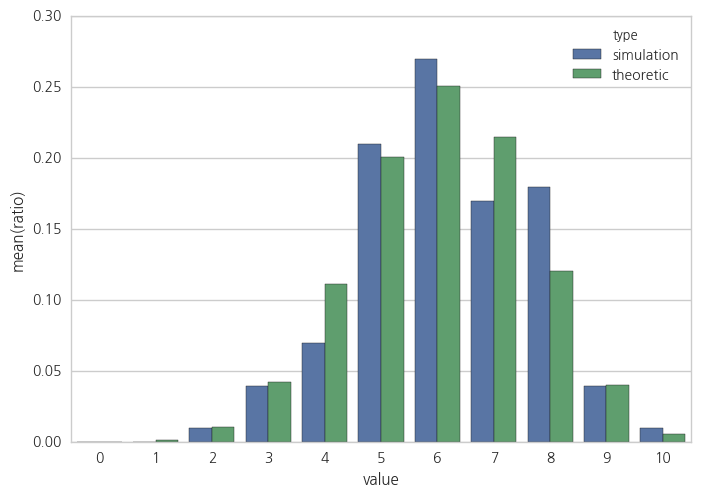

In [6]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

## 이항 분포의 모멘트

이항 분포의 기댓값과 분산은 각각 다음과 같다.

### 기댓값

$$ \text{E}[X] = N\theta $$

(증명)

$$ \text{E}[X] = \text{E} \left[ \sum_{i=1}^N \text{Bern}_i \right] = \sum_{i=1}^N  \text{E}[ \text{Bern}_i ] = N\theta $$


여기에서 $\text{Bern}_i$는 $i$번째 시도의 결과로 나온 숫자로써 서로 독립인 베르누이 분포이다.

### 분산

$$ \text{Var}[X] = N\theta(1-\theta)$$

(증명)

$$ \text{Var}[X] = \text{Var} \left[ \sum_{i=1}^N \text{Bern}_i \right] = \sum_{i=1}^N  \text{Var}[ \text{Bern}_i ] = N\theta(1-\theta)$$

#### 연습 문제 1

베르누이 확률 분포의 모수가 다음과 같을 경우에 각각 샘플을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 카운트 플롯을 그린다. 

샘플의 갯수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

1. $\theta = 0.5$, $N=5$
2. $\theta = 0.9$, $N=10$